In [1]:
# DONE

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Set it to your desired number of threads
import missingno as msno

from IPython.display import display #To display dataframe with a nice format.

# Setting display precision for pandas
pd.set_option("display.precision", 2)
# Set display option to show all columns
pd.set_option('display.max_columns', None)

blue_green      = (82/255, 162/255, 160/255)
blue_green_dark = (41/255, 81/255, 81/255)

# ==================================================================================================
# Set the fontsize & Bold for each GRAPH !!!
# ==================================================================================================
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["lines.markersize"] = 10
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams['axes.titlepad'] = 20 

In [3]:
# ==================================================================================================
# READ DATA
# ==================================================================================================
import csv
url_df_data               = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\flipkart_com-ecommerce_sample_1050.csv"
df_data = pd.read_csv(url_df_data)

print("Datasets loaded succesfully ! :D")

Datasets loaded succesfully ! :D


In [4]:
df_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [5]:
# ==================================================================================================
# CLEAN DATA AUGMENTED IMAGE FOLDER
# ==================================================================================================
import os

# Directory path
directory = r'C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\Images_scaled_rotated'

# Iterate over files in the directory
for filename in os.listdir(directory):
    # Construct the full file path
    file_path = os.path.join(directory, filename)
    
    # Check if it's a file (not a directory)
    if os.path.isfile(file_path):
        # Delete the file
        os.remove(file_path)


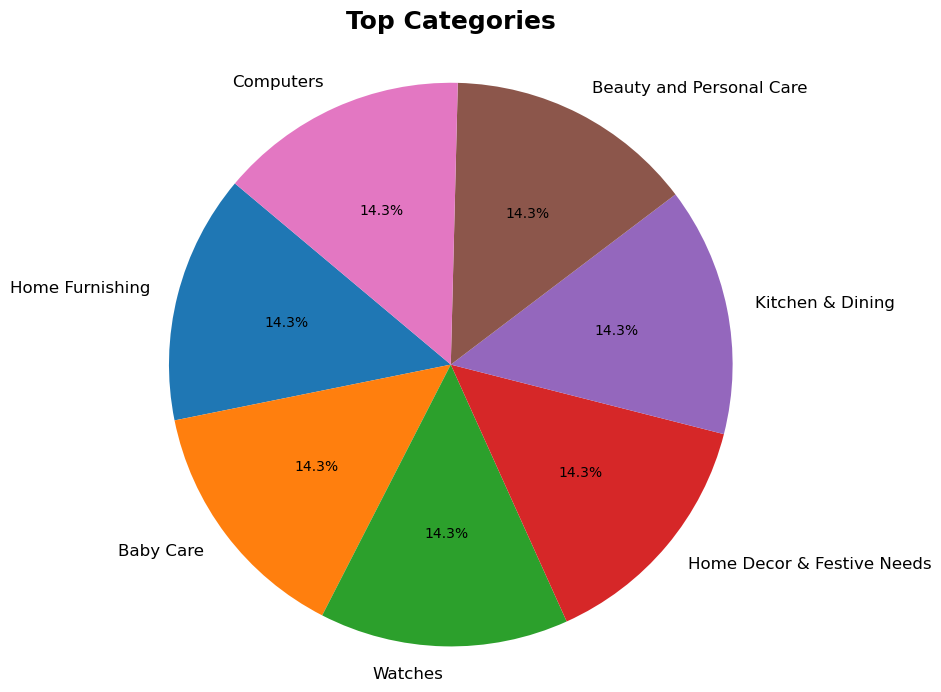

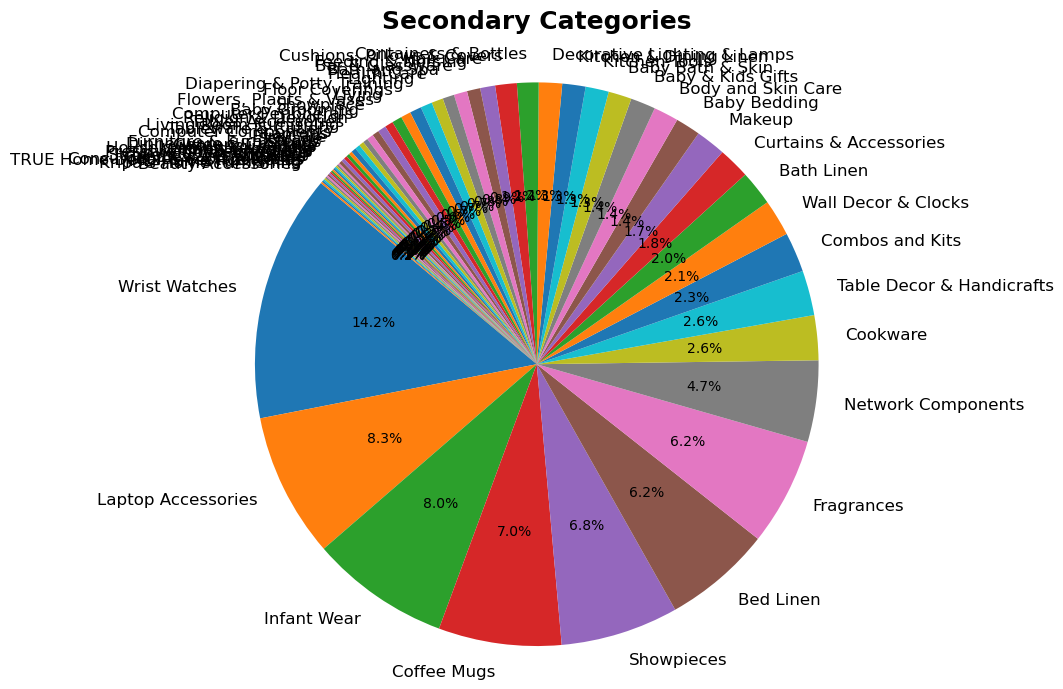

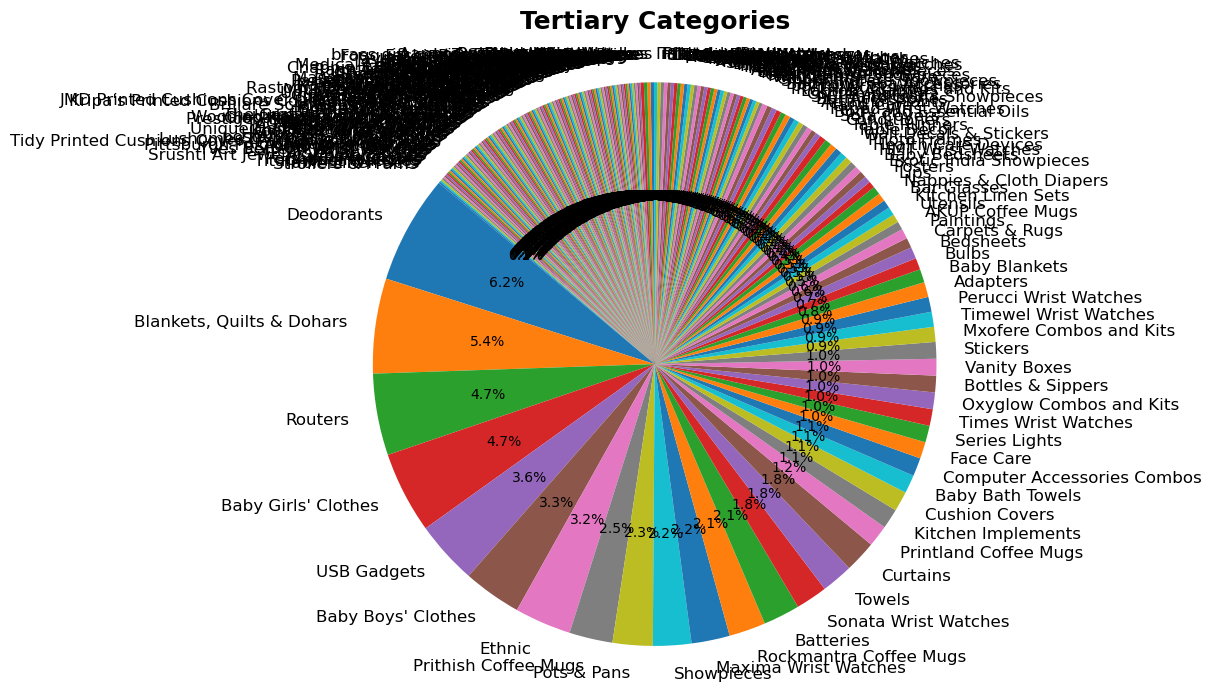

Number of unique top categories: 7
Number of unique secondary categories: 62
Number of unique tertiary categories: 241


In [6]:
# ==================================================================================================
# TRUE LABELS
# TOP, SECONDARY and TERTIARY CATEGORIES
# ==================================================================================================
# Function to extract top, secondary, and tertiary categories
def extract_categories(category_tree):
    # Split the category tree string and get categories
    categories = category_tree.strip('[]').split(">>")
    
    # Extract top category
    top_category = categories[0].strip().replace('"', '')
    
    # Extract secondary category if available
    secondary_category = categories[1].strip().replace('"', '') if len(categories) > 1 else None
    
    # Extract tertiary category if available
    tertiary_category = categories[2].strip().replace('"', '') if len(categories) > 2 else None
    
    return top_category, secondary_category, tertiary_category

# Apply the function to each row in the DataFrame
df_data['top_category'], df_data['secondary_category'], df_data['tertiary_category'] = zip(*df_data['product_category_tree'].apply(extract_categories))

# Extract unique categories
unique_top_categories = df_data['top_category'].unique()
unique_secondary_categories = df_data['secondary_category'].unique()
unique_tertiary_categories = df_data['tertiary_category'].unique()

# Function to plot pie chart for category distribution
def plot_category_pie_chart(categories, title):
    # Count the frequency of each category
    category_counts = categories.value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie chart for top categories
plot_category_pie_chart(df_data['top_category'], 'Top Categories')

# Plot pie chart for secondary categories
plot_category_pie_chart(df_data['secondary_category'], 'Secondary Categories')

# Plot pie chart for tertiary categories
plot_category_pie_chart(df_data['tertiary_category'], 'Tertiary Categories')



# ==================================================================================================
# COUNT NUMBER OF CATEGORY IN TOP, SECONDARY and TERTIARY
# ==================================================================================================
# Extract unique categories
nunique_top_categories = df_data['top_category'].nunique()
nunique_secondary_categories = df_data['secondary_category'].nunique()
nunique_tertiary_categories = df_data['tertiary_category'].nunique()

print("Number of unique top categories:", nunique_top_categories)
print("Number of unique secondary categories:", nunique_secondary_categories)
print("Number of unique tertiary categories:", nunique_tertiary_categories)

# IMPTUE TERTIARY CATEGORY
df_data['tertiary_category'].fillna("NO TERTIARY CATEGORY", inplace=True)

In [7]:
category_counts = df_data['top_category'].value_counts()
category_counts_df = category_counts.to_frame().reset_index()
category_counts_df.columns = ['Category', 'Count']
display(category_counts_df)


,Category,Count
0,Home Furnishing,150
1,Baby Care,150
2,Watches,150
3,Home Decor & Festive Needs,150
4,Kitchen & Dining,150
5,Beauty and Personal Care,150
6,Computers,150


# PHOTO PREPROCESSING TEST

In [8]:
# ==================================================================================================
# CASE N PHOTOS
# ==================================================================================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Step 1: Image Preprocessing
def preprocess_image(image, method='otsu', target_size=None, equalize_hist=False):
    # Resize image while preserving aspect ratio
    if target_size is not None:
        # Calculate aspect ratio of the original image
        original_height, original_width = image.shape[:2]
        aspect_ratio = original_width / original_height
        
        # Determine the dimension to resize based on the aspect ratio
        target_width, target_height = target_size
        if target_width / target_height > aspect_ratio:
            new_width = int(target_height * aspect_ratio)
            new_height = target_height
        else:
            new_width = target_width
            new_height = int(target_width / aspect_ratio)
        
        # Resize the image
        image = cv2.resize(image, (new_width, new_height))
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Equalize histogram if specified
    if equalize_hist:
        gray_image = cv2.equalizeHist(gray_image)
    
    # blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)
    
    # if method == 'otsu':
    #     _, processed_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # elif method == 'adaptive':
    #     processed_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    # elif method == 'canny':
    #     processed_image = cv2.Canny(blurred_image, 30, 150)
    # else:
    #     raise ValueError("Invalid method. Choose 'otsu', 'adaptive', or 'canny'.")
    
    processed_image = gray_image
    return processed_image



# Step 2: Feature Extraction
def extract_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# I. BASIC FEATURE EXTRACTION

## I.1. CREATING A REPRESENTATIVE SAMPLES OF THE DISTRIBUTION OF THE POPULATION

In [9]:
# ==================================================================================================
# Create a representive samples of the population
# ==================================================================================================
import os
import random

# Load image paths and their corresponding categories
folder_path = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\Images"
image_files = os.listdir(folder_path)
image_paths = [os.path.join(folder_path, image_file) for image_file in image_files]

# Define the number of images to sample from each category
sample_size_per_category = 150 #max : 150

# Initialize lists to store selected image paths and their corresponding labels
selected_image_paths = []
image_labels = []

# Iterate over each image category
for category in df_data['top_category'].unique():
    # Filter image paths for the current category
    category_image_paths = [image_path for image_path in image_paths if image_path.split(os.sep)[-1].split('.')[0] in df_data[df_data['top_category'] == category]['uniq_id'].values]
    
    # If the number of images in the category is less than the sample size, use all images
    if len(category_image_paths) <= sample_size_per_category:
        selected_image_paths.extend(category_image_paths)
    else:
        # Randomly sample images from the category
        selected_image_paths.extend(random.sample(category_image_paths, sample_size_per_category))
    
    # Add corresponding labels
    image_labels.extend([category] * sample_size_per_category)

# Count the number of unique categories used when selecting the photos
unique_categories_selected = len(set(image_labels))
print("Number of unique categories selected:", unique_categories_selected)

Number of unique categories selected: 7


## I.2.DATA AUGMENTATION - Create the rotated/zoomed photos

In [10]:
# # ==================================================================================================
# # Create a new set of photos (rotated and scaled)
# # ==================================================================================================

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

def zoom_image(image, zoom_factor):
    """
    Zoom in or out on the center of the image.

    Parameters:
        image (numpy.ndarray): Input image.
        zoom_factor (float): Zoom factor. Values greater than 1 zoom in, values less than 1 zoom out.

    Returns:
        numpy.ndarray: Zoomed image.
    """
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the new dimensions based on the zoom factor
    new_height = int(height / zoom_factor)
    new_width = int(width / zoom_factor)

    # Calculate the region of interest (ROI) in the original image
    start_y = max(0, int((height - new_height) / 2))
    end_y = min(height, start_y + new_height)
    start_x = max(0, int((width - new_width) / 2))
    end_x = min(width, start_x + new_width)

    # Extract the ROI from the original image
    roi = image[start_y:end_y, start_x:end_x]

    # Resize the ROI to the original image dimensions
    zoomed_image = cv2.resize(roi, (width, height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image

# Function to adjust brightness of image
def adjust_brightness(image, brightness_factor):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = np.clip(hsv[:, :, 2] * brightness_factor, 0, 255)
    brightened_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return brightened_image

# Function to adjust contrast of image
def adjust_contrast(image, contrast_factor):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab[:, :, 1] = np.clip(lab[:, :, 1] * contrast_factor, 0, 255)
    contrasted_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return contrasted_image


# Define the directory to save augmented images
output_dir = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\Images_scaled_rotated"

# Ensure the output directory exists, otherwise create it
os.makedirs(output_dir, exist_ok=True)

# Define rotation angles, zoom factors, brightness factors, and contrast factors
rotation_values = [0, 30, 60]
zoom_values = [1.1, 1.2, 1.3]
brightness_factors = [0.8, 0.9, 1.2]
contrast_factors = [0.8, 0.9, 1.2]

# Create an empty list to store the augmented data
augmented_data = []

# Iterate over selected image paths and augment each image
for idx, image_path in enumerate(selected_image_paths):
    image_name = os.path.basename(image_path)
    image_name = os.path.splitext(image_name)[0]
    image = cv2.imread(image_path)
    # Rotate the image by different angles
    for rotation_angle in rotation_values:
        rotated_image = rotate_image(image, rotation_angle)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_rotated_{rotation_angle}_{idx}.jpg"), rotated_image)
        
        rotated_filename = f"{image_name}_rotated_{rotation_angle}_{idx}.jpg"
        curr_image_row = df_data[df_data['uniq_id'] == image_name]
        curr_image_row['uniq_id'] = f"{image_name}_rotated_{rotation_angle}_{idx}"
        augmented_data.append(curr_image_row)

    # Scale the image by zooming in or out
    for zoom_factor in zoom_values:
        zoomed_image = zoom_image(image, zoom_factor)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_zoomed_{int(zoom_factor * 10)}_{idx}.jpg"), zoomed_image)

        zoomed_filename = f"{image_name}_zoomed_{int(zoom_factor * 10)}_{idx}.jpg"
        curr_image_row = df_data[df_data['uniq_id'] == image_name]
        curr_image_row['uniq_id'] = f"{image_name}_zoomed_{int(zoom_factor * 10)}_{idx}"
        augmented_data.append(curr_image_row)

    # Brightness adjustment
    for brightness_factor in brightness_factors:
        brightened_image = adjust_brightness(image, brightness_factor)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_brightened_{brightness_factor}_{idx}.jpg"), brightened_image)

        brightened_row = curr_image_row.copy()
        brightened_row['uniq_id'] = f"{image_name}_brightened_{brightness_factor}_{idx}"
        augmented_data.append(brightened_row)

    # Contrast adjustment
    for contrast_factor in contrast_factors:
        contrasted_image = adjust_contrast(image, contrast_factor)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_contrasted_{contrast_factor}_{idx}.jpg"), contrasted_image)

        contrasted_row = curr_image_row.copy()
        contrasted_row['uniq_id'] = f"{image_name}_contrasted_{contrast_factor}_{idx}"
        augmented_data.append(contrasted_row)

# Create a new dataframe with the augmented data
df_data_augmented = pd.concat(augmented_data, ignore_index=True)

display('Done with the creation of images !! :D')


C:\Users\Olivi\AppData\Local\Temp\ipykernel_17960\4103466393.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_image_row['uniq_id'] = f"{image_name}_rotated_{rotation_angle}_{idx}"
C:\Users\Olivi\AppData\Local\Temp\ipykernel_17960\4103466393.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_image_row['uniq_id'] = f"{image_name}_zoomed_{int(zoom_factor * 10)}_{idx}"


'Done with the creation of images !! :D'

In [11]:
# # ==================================================================================================
# # Create a new set of photos (rotated and scaled)
# # ==================================================================================================
# import cv2
# import os

# # Function to rotate image by a given angle
# def rotate_image(image, angle):
#     rows, cols = image.shape[:2]
#     M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
#     rotated_image = cv2.warpAffine(image, M, (cols, rows))
#     return rotated_image

# def zoom_image(image, zoom_factor):
#     """
#     Zoom in or out on the center of the image.

#     Parameters:
#         image (numpy.ndarray): Input image.
#         zoom_factor (float): Zoom factor. Values greater than 1 zoom in, values less than 1 zoom out.

#     Returns:
#         numpy.ndarray: Zoomed image.
#     """
#     # Get image dimensions
#     height, width = image.shape[:2]

#     # Calculate the new dimensions based on the zoom factor
#     new_height = int(height / zoom_factor)
#     new_width = int(width / zoom_factor)

#     # Calculate the region of interest (ROI) in the original image
#     start_y = max(0, int((height - new_height) / 2))
#     end_y = min(height, start_y + new_height)
#     start_x = max(0, int((width - new_width) / 2))
#     end_x = min(width, start_x + new_width)

#     # Extract the ROI from the original image
#     roi = image[start_y:end_y, start_x:end_x]

#     # Resize the ROI to the original image dimensions
#     zoomed_image = cv2.resize(roi, (width, height), interpolation=cv2.INTER_LINEAR)

#     return zoomed_image

# # Function to flip image horizontally
# def flip_horizontal(image):
#     flipped_image = cv2.flip(image, 1)
#     return flipped_image

# # Function to flip image vertically
# def flip_vertical(image):
#     flipped_image = cv2.flip(image, 0)
#     return flipped_image

# # Function to adjust brightness of image
# def adjust_brightness(image, brightness_factor):
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#     hsv[:, :, 2] = np.clip(hsv[:, :, 2] * brightness_factor, 0, 255)
#     brightened_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#     return brightened_image

# # Function to adjust contrast of image
# def adjust_contrast(image, contrast_factor):
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     lab[:, :, 1] = np.clip(lab[:, :, 1] * contrast_factor, 0, 255)
#     contrasted_image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
#     return contrasted_image

# # Function to randomly crop image
# def random_crop(image, crop_size):
#     height, width = image.shape[:2]
#     x = random.randint(0, width - crop_size)
#     y = random.randint(0, height - crop_size)
#     cropped_image = image[y:y+crop_size, x:x+crop_size]
#     return cropped_image






# # Define the directory to save augmented images
# output_dir = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\Images_scaled_rotated"

# # Ensure the output directory exists, otherwise create it
# os.makedirs(output_dir, exist_ok=True)


# # Create an empty list to store the augmented data
# augmented_data = []

# # Define the number of rotation steps and scale steps
# rotation_steps = 3
# scale_steps = 3
# brightness_factors = [0.8, 1.0, 1.2]
# contrast_factors = [0.8, 1.0, 1.2]

# # Iterate over selected image paths and augment each image
# for idx, image_path in enumerate(selected_image_paths):
#     image_name = os.path.basename(image_path)
#     image_name = os.path.splitext(image_name)[0]

#     image = cv2.imread(image_path)
#     cntZoom = 0
#     # Rotate the image by different angles
#     for rotation_step in range(rotation_steps):
#         angle = 360 / rotation_steps * rotation_step
#         rotated_image = rotate_image(image, angle)
#         cv2.imwrite(os.path.join(output_dir, f"{image_name}_rotated_{int(angle)}_{idx}.jpg"), rotated_image)
        
#         rotated_filename = f"{image_name}_rotated_{angle}_{idx}.jpg"
#         curr_image_row = df_data[df_data['uniq_id'] == image_name]
#         curr_image_row['uniq_id'] = f"{image_name}_rotated_{int(angle)}_{idx}"
#         augmented_data.append(curr_image_row)

    
#     # Scale the image by zooming in or out
#     for scale_step in range(scale_steps):
#         cntZoom = cntZoom + 1
#         zoom_factor = 1 + 0.1 * scale_step  # Zoom factors 
#         zoomed_image = zoom_image(image, zoom_factor)
#         cv2.imwrite(os.path.join(output_dir, f"{image_name}_zoomed_{int(zoom_factor)+cntZoom}_{idx}.jpg"), zoomed_image)

#         zoomed_filename = f"{image_name}_zoomed_{int(zoom_factor)+cntZoom}_{idx}.jpg"
#         curr_image_row = df_data[df_data['uniq_id'] == image_name]
#         curr_image_row['uniq_id'] = f"{image_name}_zoomed_{int(zoom_factor)+cntZoom}_{idx}"
#         augmented_data.append(curr_image_row)

#     # Brightness adjustment
#     for brightness_factor in brightness_factors:
#         brightened_image = adjust_brightness(rotated_image, brightness_factor)
#         brightened_filename = f"{image_name}_brightened_{brightness_factor}_{idx}.jpg"
#         cv2.imwrite(os.path.join(output_dir, brightened_filename), brightened_image)

#         brightened_row = curr_image_row.copy()
#         brightened_row['uniq_id'] = f"{image_name}_brightened_{brightness_factor}_{idx}"
#         augmented_data.append(brightened_row)


#     # Contrast adjustment
#     for contrast_factor in contrast_factors:
#         contrasted_image = adjust_contrast(rotated_image, contrast_factor)
#         contrasted_filename = f"{image_name}_contrasted_{contrast_factor}_{idx}.jpg"
#         cv2.imwrite(os.path.join(output_dir, contrasted_filename), contrasted_image)

#         contrasted_row = curr_image_row.copy()
#         contrasted_row['uniq_id'] = f"{image_name}_contrasted_{contrast_factor}_{idx}"
#         augmented_data.append(contrasted_row)


# # Create a new dataframe with the augmented data
# df_data_augmented = pd.concat(augmented_data, ignore_index=True)

# display('Done with the creation of images !! :D')

In [12]:
# ==================================================================================================
# Create a representive samples of the population
# DATA AUGMENTATION
# ==================================================================================================
import os
import random

# Load image paths and their corresponding categories
folder_path = r"C:\Users\Olivi\OneDrive\Documents\OC_Formation_DATA_SCIENCE\PROJET6_Classifiez_automatiquement_des_biens_de_consommation\DATA\Flipkart\Images_scaled_rotated"
image_files = os.listdir(folder_path)
image_paths = [os.path.join(folder_path, image_file) for image_file in image_files]

# Define the number of images to sample from each category
# sample_size_per_category = 150 * (rotation_steps + scale_steps)
# sample_size_per_category = 150 * (rotation_steps + scale_steps +len(brightness_factors) + len(contrast_factors))
sample_size_per_category = 150 * (len(rotation_values) + len(zoom_values))
# sample_size_per_category = 150 * (len(rotation_values) + len(zoom_values) +len(brightness_factors) + len(contrast_factors))


rotation_steps = 3
scale_steps = 3

# Initialize lists to store selected image paths and their corresponding labels
selected_image_paths = []
image_labels = []

# Iterate over each image category
for category in df_data['top_category'].unique():
    # Filter image paths for the current category
    category_image_paths = [image_path for image_path in image_paths if image_path.split(os.sep)[-1].split('.')[0] in df_data_augmented[df_data_augmented['top_category'] == category]['uniq_id'].values]
    
    # If the number of images in the category is less than the sample size, use all images
    if len(category_image_paths) <= sample_size_per_category:
        selected_image_paths.extend(category_image_paths)
    else:
        # Randomly sample images from the category
        selected_image_paths.extend(random.sample(category_image_paths, sample_size_per_category))
    
    # Add corresponding labels
    image_labels.extend([category] * sample_size_per_category)

# Count the number of unique categories used when selecting the photos
unique_categories_selected = len(set(image_labels))
print("Number of unique categories selected:", unique_categories_selected)

Number of unique categories selected: 7


# II. ADVANCE FEATURE EXTRACTION USING TRANSFER LEARNING (CNN)

In [13]:
import cv2
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_rand_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder


# Define a function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img.astype(np.float32)  # Convert to float32
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

results_list = []

## STRATEGY 3 :  Fine-Tuning Partiel 
Uses a custom neural network model built on top of the VGG16 architecture for end-to-end training.

In [14]:
# # Load and preprocess selected images
# images = []
# for image_path in selected_image_paths:
#     processed_image = preprocess_image(image_path)
#     images.append(processed_image)

# # Convert list of images to a numpy array
# images = np.array(images)

# # Display one preprocessed image
# plt.imshow(images[0])  # Assuming you want to display the first image
# plt.axis('off')
# plt.show()

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(images, image_labels, test_size=0.2, random_state=42)

# # Convert labels to numpy array
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

# label_encoder = LabelEncoder() # Initialize LabelEncoder
# y_train = label_encoder.fit_transform(y_train) # Initialize LabelEncoder
# y_test = label_encoder.transform(y_test) # Encode labels for y_test using the same label encoder

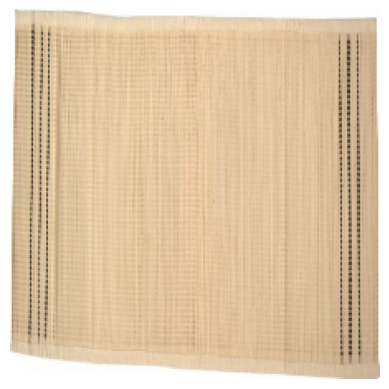

Training set size: 4410
Validation set size: 945
Testing set size: 945


In [15]:
from sklearn.model_selection import train_test_split

# Load and preprocess selected images
images = []
for image_path in selected_image_paths:
    processed_image = preprocess_image(image_path)
    images.append(processed_image)

# Convert list of images to a numpy array
images = np.array(images)

# # Display one preprocessed image
plt.imshow(images[0])  # Assuming you want to display the first image
plt.axis('off')
plt.show()

# Split data into training and testing sets
# X_train, X_temp, y_train, y_temp = train_test_split(images, image_labels, test_size=0.3, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(images, image_labels, test_size=0.3, random_state=42, stratify=image_labels)

# Further split the temporary data into validation and testing sets
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert labels to numpy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Encode labels for y_train and y_test using the same label encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Verify the sizes of each set
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:", len(X_test))


### INITIAL CUSTOM MODEL

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 316s 4s/step - accuracy: 0.4878 - loss: 1.8804 - val_accuracy: 0.8254 - val_loss: 0.5385
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.9175 - loss: 0.2753 - val_accuracy: 0.9026 - val_loss: 0.3374
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9767 - loss: 0.0963 - val_accuracy: 0.9185 - val_loss: 0.2651
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9941 - loss: 0.0341 - val_accuracy: 0.9101 - val_loss: 0.2731
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.9979 - loss: 0.0206 - val_accuracy: 0.9228 - val_loss: 0.2581
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.9994 - loss: 0.0059 - val_accuracy: 0.9344 - val_loss: 0.2444
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9386 - val_loss: 0.2417
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9333 - v

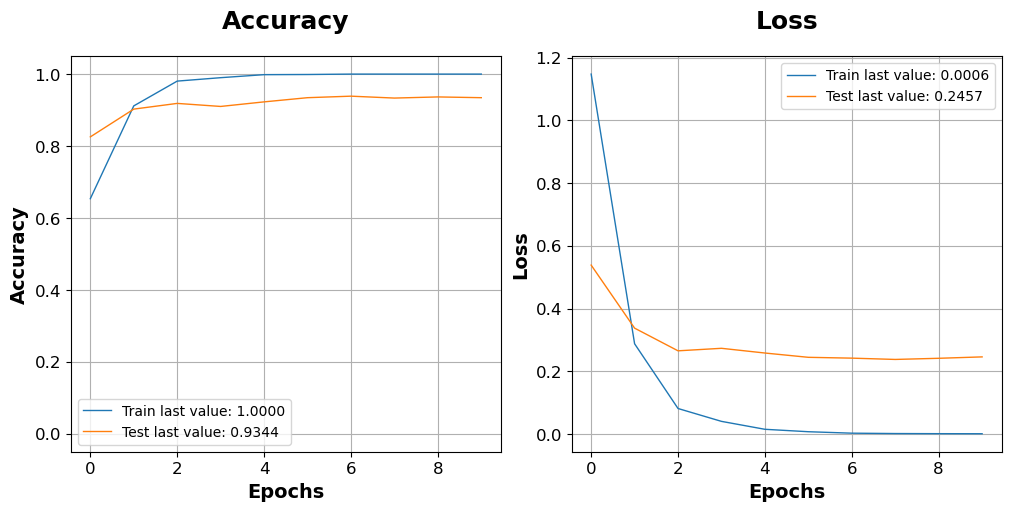

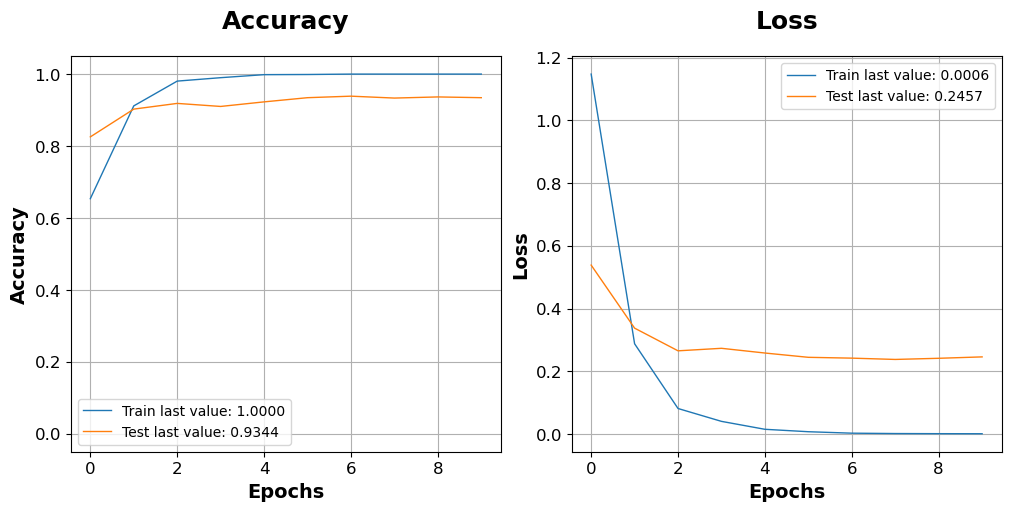

In [16]:
# Load pre-trained VGG16 model (without top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom neural network model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the training set and validating on the validation set
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on training, validation, and testing sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot training history
show_history(history)
plot_history(history, path="training_history.png")
plt.show()

In [17]:
# # Predict labels for test set
# y_pred = model.predict(X_test)
# # Convert one-hot encoded predictions to categorical labels
# y_pred_categorical = np.argmax(y_pred, axis=1)
# from sklearn.metrics import adjusted_rand_score

# # Compute Adjusted Rand Index
# ari = adjusted_rand_score(y_test, y_pred_categorical)
# print("Adjusted Rand Index:", ari)

# # Create an empty list to store results
# results_list = []
# results_list.append({'Classifieur': 'CNN - Transfert Learning - Data Augmentation - Initial Custom', 'ARI': ari, 'Best Accuracy': test_accuracy})
# df_results = pd.DataFrame(results_list) # Convert the list of dictionaries to a DataFrame

In [18]:
# Predict labels for valdiation set
y_pred = model.predict(X_val)
# Convert one-hot encoded predictions to categorical labels
y_pred_categorical = np.argmax(y_pred, axis=1)
from sklearn.metrics import adjusted_rand_score

# Compute Adjusted Rand Index
ari = adjusted_rand_score(y_val, y_pred_categorical)
print("Adjusted Rand Index:", ari)

# Create an empty list to store results
results_list = []
results_list.append({'Classifieur': 'CNN - Transfert Learning - Data Augmentation - Initial Custom', 'ARI': ari, 'Best Accuracy': test_accuracy})
df_results = pd.DataFrame(results_list) # Convert the list of dictionaries to a DataFrame

30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step
Adjusted Rand Index: 0.854126235501856


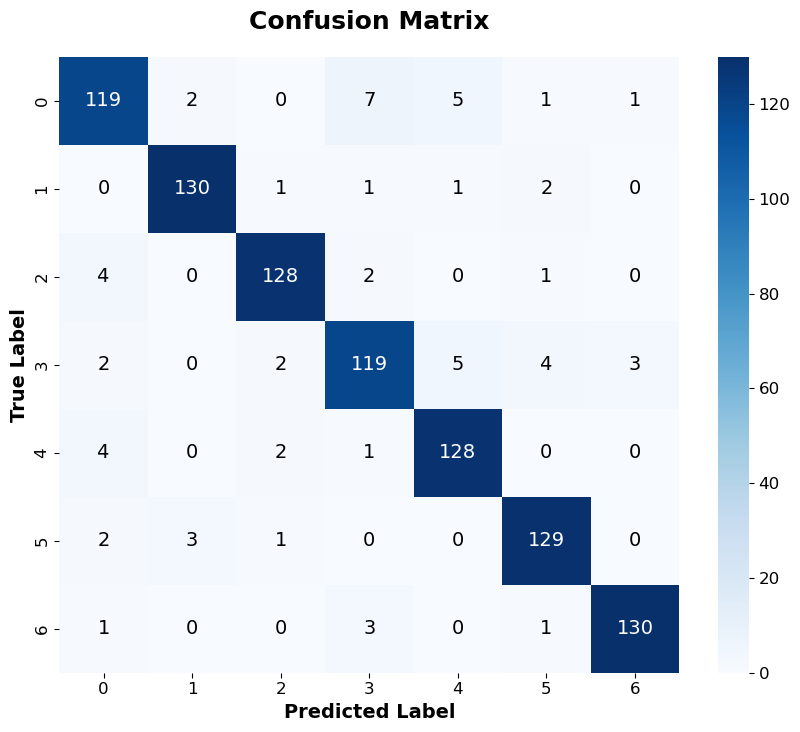

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_categorical, labels=np.unique(y_val))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred_categorical), yticklabels=np.unique(y_val))
# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color=color, fontsize=14)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### CUSTOM MODEL WITH DROPOUT and BATCHNORMALIZATION

In [20]:
# # Load pre-trained VGG16 model (without top classification layer)
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Create a custom neural network model
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),  # Add dropout layer with dropout rate of 0.5
#     BatchNormalization(),  # Add batch normalization layer
#     Dense(256, activation='relu'),
#     Dropout(0.5),  # Add dropout layer with dropout rate of 0.5
#     BatchNormalization(),  # Add batch normalization layer
#     Dense(128, activation='relu'),
#     Dropout(0.5),  # Add dropout layer with dropout rate of 0.5
#     BatchNormalization(),  # Add batch normalization layer
#     Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=1)

# # Evaluate the model on training and testing sets
# train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", test_accuracy)

# # Plot training history
# show_history(history)
# plot_history(history, path="training_history.png")
# plt.show()

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.4918 - loss: 1.4724 - val_accuracy: 0.6315 - val_loss: 1.1389
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.8079 - loss: 0.5971 - val_accuracy: 0.8299 - val_loss: 0.5359
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.8896 - loss: 0.3333 - val_accuracy: 0.8118 - val_loss: 0.5482
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9089 - loss: 0.2913 - val_accuracy: 0.7676 - val_loss: 0.7029
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.9217 - loss: 0.2363 - val_accuracy: 0.8639 - val_loss: 0.4021
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.9634 - loss: 0.1233 - val_accuracy: 0.9195 - val_loss: 0.2936
Epoch 7/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 177s 3s/step - accuracy: 0.9728 - loss: 0.1018 - val_accuracy: 0.8878 - val_loss: 0.4200
Epoch 8/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.9723 - loss: 0.0934 - val_accuracy: 0.8515 - v

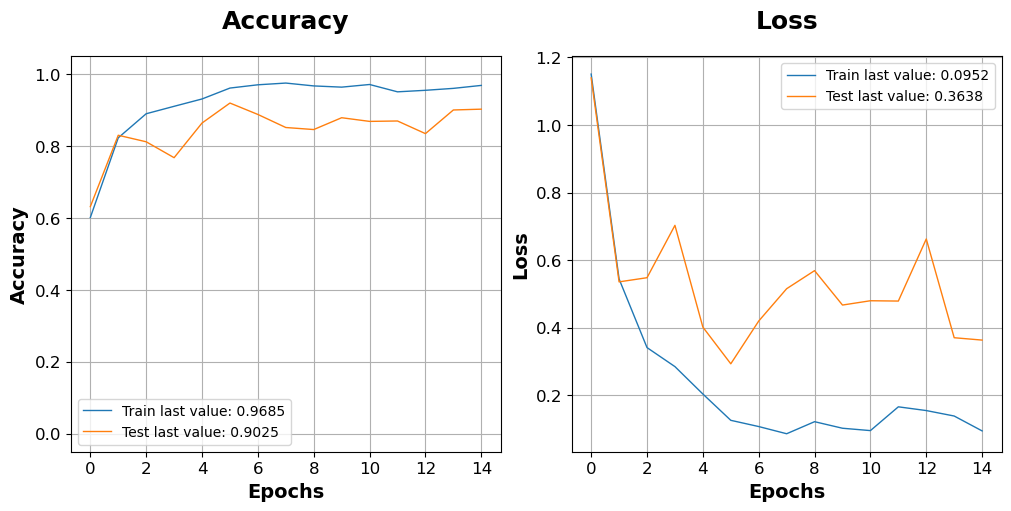

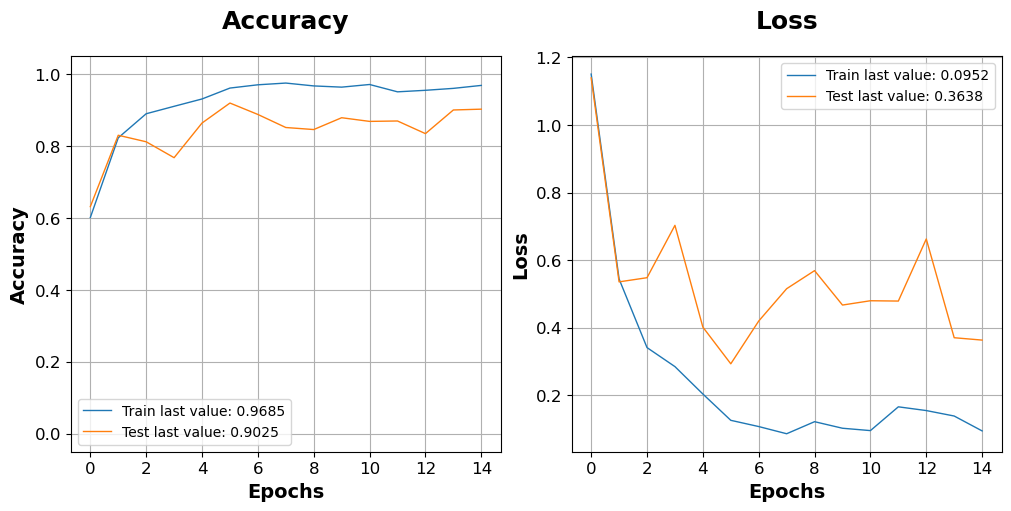

In [21]:
# Load pre-trained VGG16 model (without top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom neural network model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),  # Add dropout layer with dropout rate of 0.5
    BatchNormalization(),  # Add batch normalization layer
    Dense(256, activation='relu'),
    Dropout(0.2),  # Add dropout layer with dropout rate of 0.5
    BatchNormalization(),  # Add batch normalization layer
    Dense(128, activation='relu'),
    Dropout(0.2),  # Add dropout layer with dropout rate of 0.5
    BatchNormalization(),  # Add batch normalization layer
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on training, validation, and testing sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Testing Accuracy:", test_accuracy)

# Plot training history
show_history(history)
plot_history(history, path="training_history.png")
plt.show()

In [22]:
# # Predict labels for test set
# y_pred = model.predict(X_test)
# # Convert one-hot encoded predictions to categorical labels
# y_pred_categorical = np.argmax(y_pred, axis=1)
# from sklearn.metrics import adjusted_rand_score

# # Compute Adjusted Rand Index
# ari = adjusted_rand_score(y_test, y_pred_categorical)
# print("Adjusted Rand Index:", ari)

# results_list.append({'Classifieur': 'CNN - Transfert Learning - Data Augmentation - With Dropout & Batch Normalization', 'ARI': ari, 'Best Accuracy': test_accuracy})
# df_results = pd.DataFrame(results_list) # Convert the list of dictionaries to a DataFrame

In [23]:
# Predict labels for valdiation set
y_pred = model.predict(X_val)
# Convert one-hot encoded predictions to categorical labels
y_pred_categorical = np.argmax(y_pred, axis=1)
from sklearn.metrics import adjusted_rand_score

# Compute Adjusted Rand Index
ari = adjusted_rand_score(y_val, y_pred_categorical)
print("Adjusted Rand Index:", ari)

# Create an empty list to store results
results_list.append({'Classifieur': 'CNN - Transfert Learning - Data Augmentation - DropOut & Batch', 'ARI': ari, 'Best Accuracy': test_accuracy})
df_results = pd.DataFrame(results_list) # Convert the list of dictionaries to a DataFrame

30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step
Adjusted Rand Index: 0.7693397020168379


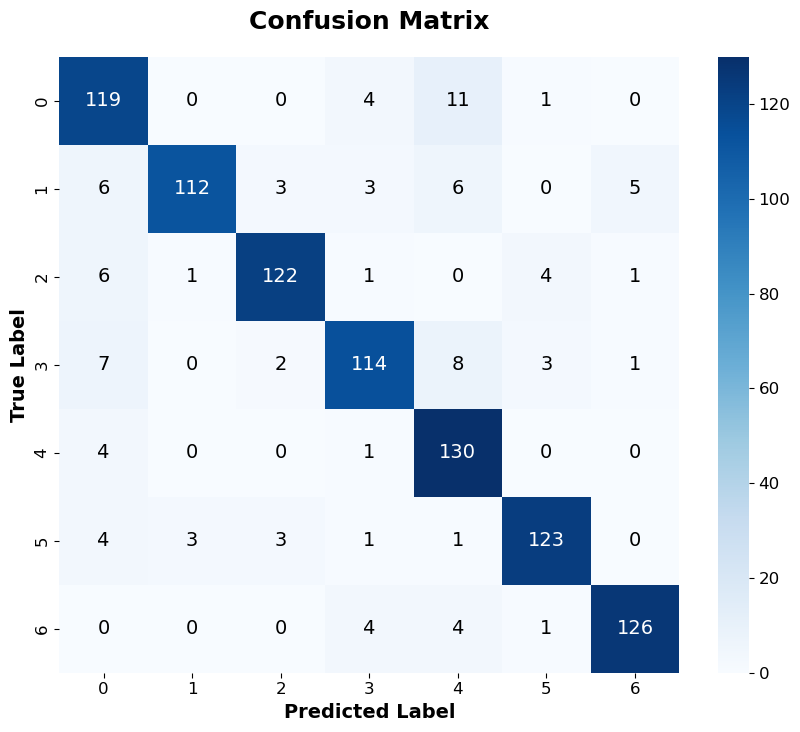

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_categorical, labels=np.unique(y_val))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred_categorical), yticklabels=np.unique(y_val))
# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha='center', va='center', color=color, fontsize=14)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## II.1. RESULTS

In [25]:
display(df_results)

,Classifieur,ARI,Best Accuracy
0,CNN - Transfert Learning - Data Augmentation -...,0.85,0.93
1,CNN - Transfert Learning - Data Augmentation -...,0.77,0.90
